In [1]:
from mhr.utils.utils import process_jsonl
token_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_token_reverse_index.jsonl"
object_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_dino_stat_reverse_index.jsonl"
co_occurrence_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_co_occurrence_reverse_index.jsonl"
what_word_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/reverse_index/llava_v1_5_mix665k_what_word_reverse_index.jsonl"

token_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/reverse_index/token_reverse_index.jsonl"
object_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/reverse_index/dinoobj_reverse_index.jsonl"
co_occurrence_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/pt/reverse_index/dinocooccur_reverse_index.jsonl"

token_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/token_reverse_index.jsonl"
object_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/dinoobj_reverse_index.jsonl"
co_occurrence_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/dinocooccur_reverse_index.jsonl"
what_word_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/sharegpt4v_train/ft/reverse_index/whatword_reverse_index.jsonl"

token_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/token_reverse_index.jsonl"
object_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/dinoobj_reverse_index.jsonl"
co_occurrence_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/dinocooccur_reverse_index.jsonl"
what_word_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-Instruct-150K/new/reverse_index/whatword_reverse_index.jsonl"

# token_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-LCS-558K/dr_algo/reverse_index/token_reverse_index.jsonl"
# object_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-LCS-558K/dr_algo/reverse_index/llamaobj_reverse_index.jsonl"
# co_occurrence_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-LCS-558K/dr_algo/reverse_index/llamacooccur_reverse_index.jsonl"
# what_word_input_file="/mnt/petrelfs/songmingyang/songmingyang/data/llava_train/LLaVA-LCS-558K/dr_algo/reverse_index/whatword_reverse_index.jsonl"



In [2]:
token_data = process_jsonl(token_input_file)
object_data = process_jsonl(object_input_file)
co_occurrence_data = process_jsonl(co_occurrence_input_file)
what_word_data = process_jsonl(what_word_input_file)

token_data.sort(key=lambda x: len(x["ids"]), reverse=True)
object_data.sort(key=lambda x: len(x["ids"]), reverse=True)
co_occurrence_data.sort(key=lambda x: len(x["ids"]), reverse=True)
what_word_data.sort(key=lambda x: len(x["ids"]), reverse=True)

token_data = [(x["object"],len(x["ids"])) for x in token_data]
object_data = [(x["object"],len(x["ids"])) for x in object_data]
co_occurrence_data = [(x["object"],len(x["ids"])) for x in co_occurrence_data]
what_word_data = [(x["object"],len(x["ids"])) for x in what_word_data]

token_sum = sum([x[1] for x in token_data])
object_sum = sum([x[1] for x in object_data])
co_occurrence_sum = sum([x[1] for x in co_occurrence_data])
what_word_sum = sum([x[1] for x in what_word_data])



In [8]:
def get_90_index(data,sum,ratio=0.9):
    sum_90 = sum*ratio
    sum_temp = 0
    for i in range(len(data)):
        sum_temp += data[i][1]
        if sum_temp >= sum_90:
            return i
        
token_threshold = 0.93
object_threshold = 0.85
co_occurrence_threshold = 0.6
what_word_threshold = 0.97

token_90_loc = get_90_index(token_data,token_sum,token_threshold)
object_90_loc = get_90_index(object_data,object_sum,object_threshold)
co_occurrence_90_loc = get_90_index(co_occurrence_data,co_occurrence_sum,co_occurrence_threshold)
what_word_90_loc = get_90_index(what_word_data,what_word_sum,what_word_threshold)
print(f"token_{token_threshold}_loc:{token_90_loc}, object_{object_threshold}_loc:{object_90_loc}, co_occurrence_{co_occurrence_threshold}_loc:{co_occurrence_90_loc}, what_word_what_word_threshold_loc:{what_word_90_loc}")
print(f"token_total {len(token_data)} object_total {len(object_data)} co_occurrence_total {len(co_occurrence_data)} what_word_total {len(what_word_data)}")

token_0.9_loc:3332, object_0.9_loc:3904, co_occurrence_0.6_loc:29097, what_word_what_word_threshold_loc:31
token_total 438026 object_total 93740 co_occurrence_total 838963 what_word_total 9770


In [9]:
token_data[6745]
len([i for i in token_data if i < token_data[6745]])/len(token_data)
1-(token_90_loc)/len(token_data)
print(f"token < {token_threshold}:{1-(token_90_loc)/len(token_data)}, object < {object_threshold}:{1-(object_90_loc)/len(object_data)}, co_occurrence < {co_occurrence_threshold}:{1-(co_occurrence_90_loc)/len(co_occurrence_data)}, what_word < {what_word_threshold}:{1-(what_word_90_loc)/len(what_word_data)}")

token < 0.9:0.9923931456123609, object < 0.9:0.9583528909750373, co_occurrence < 0.6:0.9653178984055316, what_word < 0.9:0.9968270214943705


In [10]:
print(f"token threshold:{token_data[token_90_loc]}, object threshold:{object_data[object_90_loc]}, co_occurrence threshold:{co_occurrence_data[co_occurrence_90_loc]}, what_word threshold:{what_word_data[what_word_90_loc]}")

token threshold:('limb', 568), object threshold:('little child', 20), co_occurrence threshold:('ambulance,car', 11), what_word threshold:('could', 3020)


In [7]:
token_level_res = f"Token & {token_data[token_90_loc][1]} &  {(token_90_loc)/len(token_data)*100 :.2f} ({token_90_loc}/{len(token_data)}) & {token_threshold*100} ({int(0.9*token_sum)}/{token_sum}) \\\\\n"
object_level_res = f"Object & {object_data[object_90_loc][1]} &  {(object_90_loc)/len(object_data)*100 :.2f} ({object_90_loc}/{len(object_data)}) & {object_threshold*100} ({int(0.9*object_sum)}/{object_sum}) \\\\\n"
co_occurrence_level_res = f"Co-occurrence & {co_occurrence_data[co_occurrence_90_loc][1]} &  {(co_occurrence_90_loc)/len(co_occurrence_data)*100 :.2f} ({co_occurrence_90_loc}/{len(co_occurrence_data)}) & {co_occurrence_threshold*100} ({int(0.75*co_occurrence_sum)}/{co_occurrence_sum}) \\\\\n"
what_word_level_res = f"Interrogation & {what_word_data[what_word_90_loc][1]} &  {(what_word_90_loc)/len(what_word_data)*100 :.2f} ({what_word_90_loc}/{len(what_word_data)}) & {what_word_threshold*100} ({int(0.9*what_word_sum)}/{what_word_sum}) \\\\\n"
res = token_level_res + object_level_res + co_occurrence_level_res + what_word_level_res
print(res)


Token & 211 &  1.32 (5771/438026) & 93.0 (25267532/28075036) \\
Object & 74 &  1.62 (1516/93740) & 85.0 (1610397/1789331) \\
Co-occurrence & 11 &  3.47 (29097/838963) & 60.0 (2290911/3054549) \\
Interrogation & 194 &  1.80 (176/9770) & 97.0 (1546236/1718041) \\



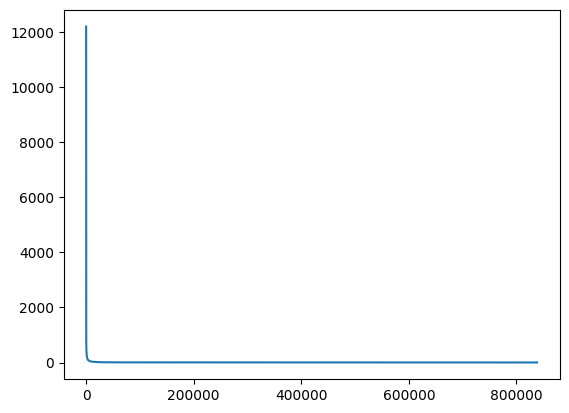

In [36]:
from matplotlib import pyplot as plt
plt.plot([x[1] for x in co_occurrence_data])